table of contents
1. 検索クエリの調査
1. テーブル取得

In [1]:
import os

import urllib.request
from datetime import datetime

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

In [2]:
DRIVER_PATH = '/Users/saeru/Downloads/chromedriver'

In [3]:
URL = 'https://data.j-league.or.jp/SFRT05/?search=search&yearIdLabel=2021%E5%B9%B4&yearId=2021&competitionIdLabel=%E6%98%8E%E6%B2%BB%E5%AE%89%E7%94%B0%E7%94%9F%E5%91%BD%EF%BC%AA%EF%BC%91%E3%83%AA%E3%83%BC%E3%82%B0&competitionId=492'

# データの抽出

## ソースの表示

In [4]:
df_list = []
for i in [0, 9]:
    url = f'{URL}&currIdx={i}'
    data = urllib.request.urlopen(url)
    soup = BeautifulSoup(data, "html")
    
    c_list = [el.text for el in soup.find('table').find_all('th', class_='wd01')]
    index_list = [el.text for el in soup.find('table').find_all('th', class_='fixed')][1:-1]
    data_array = np.array([int(el.text.replace('s\xa0:\xa0','')) if el.text != '\xa0\xa0' else None for i, el in enumerate(soup.find('table').find_all('li')) if i%2 == 0]).reshape(20, 9)
    df = pd.DataFrame(index=index_list, columns=c_list, data=data_array)
    
    df_list.append(df)
    
df = pd.concat(df_list, axis=1)

In [5]:
df

,第１節,第１１節,第２節,第３節,第４節,第５節,第６節,第７節,第８節,第９節,第１８節,第１９節,第１０節,,第２２節,第１２節,第１３節,第２０節
札幌,1,2,8,12,14,13,14,13,13,14,14,14,16,None,None,None,None,None
仙台,8,8,16,17,18,18,18,20,19,19,19,19,19,None,None,None,None,None
鹿島,17,17,18,13,11,14,15,16,14,15,15,15,12,None,None,None,None,None
浦和,8,8,15,11,13,12,13,12,10,9,10,10,10,None,None,None,None,None
柏,18,18,10,14,16,16,17,17,17,16,16,16,15,None,None,None,None,None
FC東京,8,8,5,9,10,7,6,7,6,8,8,8,8,None,None,None,None,None
川崎Ｆ,3,1,1,1,1,1,1,1,1,1,1,1,1,None,None,None,None,None
横浜FM,18,18,14,9,5,5,8,8,8,7,7,7,6,None,None,None,None,None
横浜FC,20,20,20,20,20,20,20,19,20,20,20,20,20,None,None,None,None,None
湘南,15,15,18,19,15,15,16,14,15,12,12,12,13,None,None,None,None,None


# 可視化

## Bumpy Chart

library

In [6]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text
import japanize_matplotlib

from mplsoccer import Bumpy, FontManager, add_image

font

In [7]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "static/Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "static/Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                         "static/Roboto-Medium.ttf?raw=true"))

image

In [8]:
epl = Image.open(
    urlopen("https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/epl.png?raw=true")
)

data

In [9]:
season_dict = {}
team_list = ['川崎Ｆ', '名古屋', '鳥栖']
for team in team_list:
    season_dict[team] = df.loc[team, df.columns.tolist()[:-5]].values.tolist()

viz

[1, 11, 2, 3, 4, 5, 6, 7, 8, 9, 18, 19, 10]

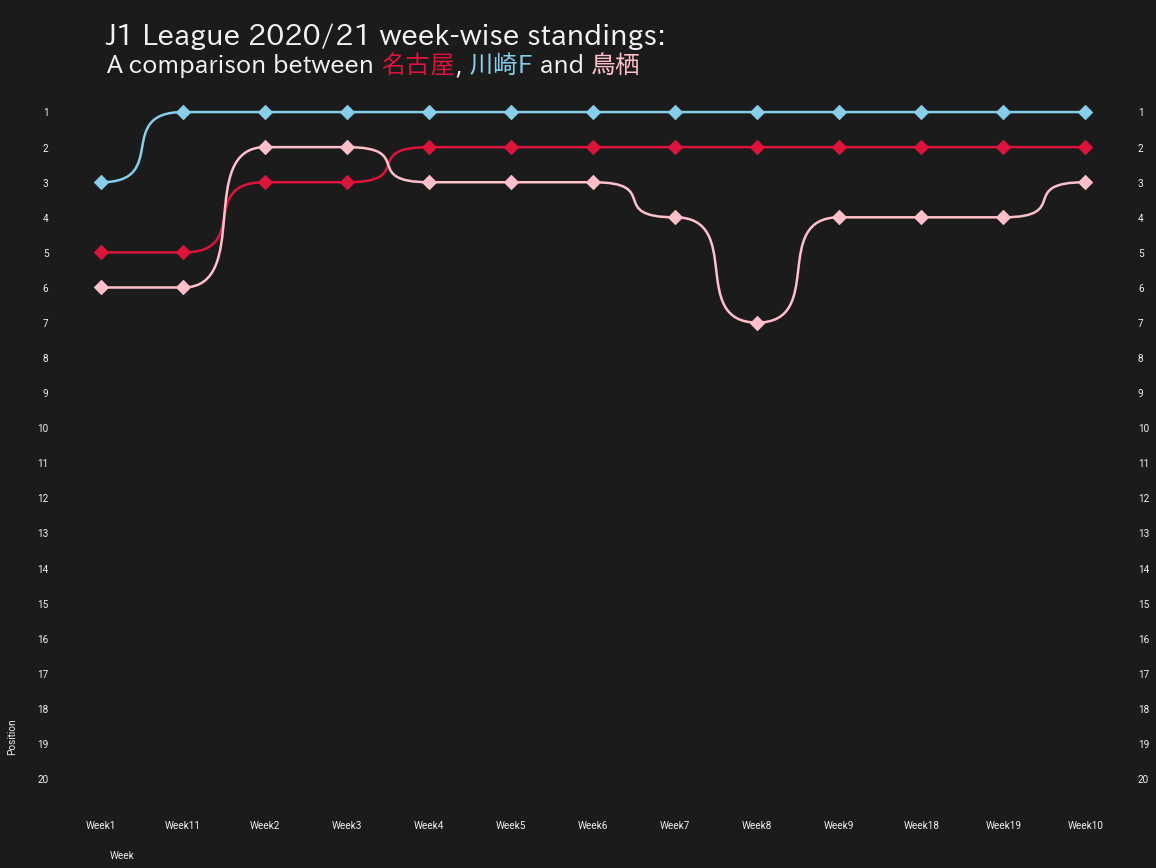

In [24]:
match_day = [f"Week{int(match.replace('第','').replace('節',''))}" for match in df.columns.tolist()[:-5]]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    "名古屋": "crimson",
    "川崎Ｆ": "skyblue",
    "鳥栖": "pink"
}

# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=0,  # rotate x-ticks by 90 degrees
    ticklabel_size=30, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(16, 12),  # size of the figure
    x_label='Week', y_label='Position',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    fontproperties=font_normal.prop,   # fontproperties for labels
)

# title and subtitle
TITLE = "J1 League 2020/21 week-wise standings:"
SUB_TITLE = "A comparison between <名古屋>, <川崎F> and <鳥栖>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", 
#          fontproperties=font_bold.prop
        )

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'skyblue'}, {"color": 'pink'}],
    size=25, fig=fig, 
#     fontproperties=font_bold.prop
)

# add image
"""
fig = add_image(
     epl,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)
"""
# if space is left in the plot use this
plt.tight_layout(pad=0.5)